
## Cryptocurrency Closing Price Prediction Challenge


Can you predict the closing price for a cryptocurrency? 

The objective of this challenge is to create a machine learning model that will predict closing price for a crypto currency coing. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.simplefilter(action='ignore')
#from google.colab import files

In [2]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [3]:
# check data shapes
train.shape, test.shape, ss.shape

((12632, 49), (6222, 48), (6222, 2))

In [4]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [5]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [6]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,12632.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
open,8617.0,1.550482e+04,1.410571e+04,4.545088e+03,8.405552e+03,9.671832e+03,1.307720e+04,6.140893e+04
high,8617.0,1.555948e+04,1.419111e+04,4.589712e+03,8.437392e+03,9.689752e+03,1.308984e+04,6.150737e+04
low,8617.0,1.544959e+04,1.402265e+04,4.267292e+03,8.378513e+03,9.648410e+03,1.304711e+04,6.107319e+04
volume,8605.0,1.300724e+09,1.711922e+09,2.373622e+08,6.196589e+08,9.820621e+08,1.611974e+09,5.185678e+10
market_cap,8379.0,2.826010e+11,2.663052e+11,8.393765e+10,1.506098e+11,1.755833e+11,2.191438e+11,1.140905e+12
url_shares,8575.0,1.247310e+03,5.931083e+02,2.000000e+00,8.570000e+02,1.124000e+03,1.507500e+03,1.010700e+04
unique_url_shares,8575.0,7.578629e+02,3.036274e+02,2.000000e+00,5.590000e+02,7.030000e+02,8.930000e+02,4.880000e+03
reddit_posts,12391.0,3.652772e+01,3.161028e+01,1.000000e+00,1.300000e+01,2.800000e+01,5.000000e+01,5.000000e+02
reddit_posts_score,12391.0,3.239898e+02,6.774196e+02,0.000000e+00,7.900000e+01,1.560000e+02,3.280000e+02,3.055900e+04


# Let's look for missing values

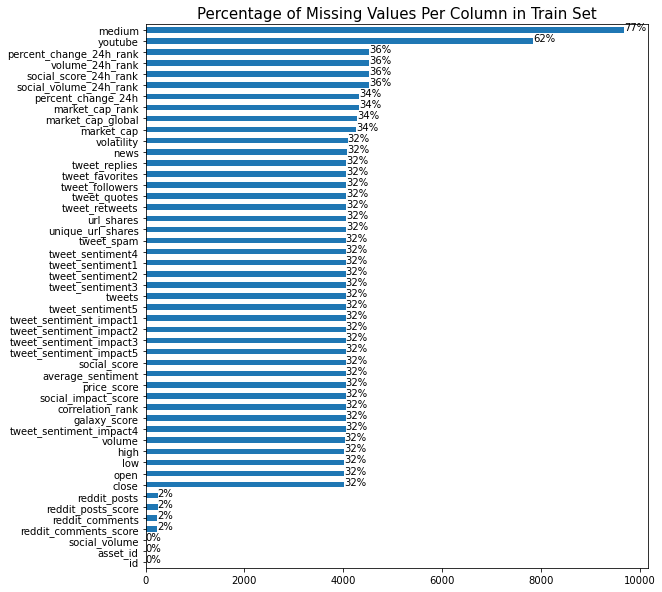

In [7]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

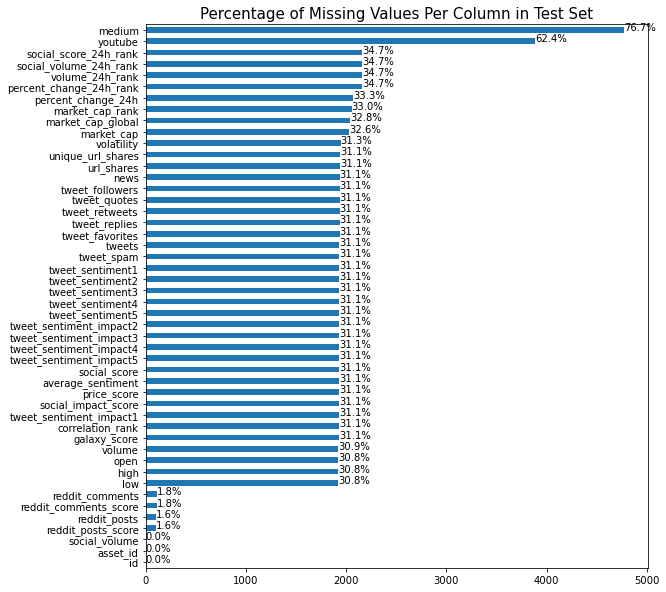

In [8]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [9]:
print(train.columns.to_list())

['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap', 'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score', 'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam', 'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies', 'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5', 'tweet_sentiment_impact1', 'tweet_sentiment_impact2', 'tweet_sentiment_impact3', 'tweet_sentiment_impact4', 'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news', 'price_score', 'social_impact_score', 'correlation_rank', 'galaxy_score', 'volatility', 'market_cap_rank', 'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank', 'social_score_24h_rank', 'medium', 'youtube', 'social_volume', 'percent_change_24h', 'market_cap_global', 'close']


### FEATURE ENGINEERING 

In [10]:
train['Average tweet sentiment'] = train['tweet_sentiment1'] +train['tweet_sentiment2']+train['tweet_sentiment3'] +train['tweet_sentiment4'] + train['tweet_sentiment5']/5
train[' average tweet_sentiment_impact'] = train['tweet_sentiment_impact1'] +train['tweet_sentiment_impact2']+train['tweet_sentiment_impact3'] +train['tweet_sentiment_impact4'] + train['tweet_sentiment_impact5']/5
test['Average tweet sentiment'] = test['tweet_sentiment1'] +test['tweet_sentiment2']+test['tweet_sentiment3'] +test['tweet_sentiment4'] + test['tweet_sentiment5']/5
test[' average tweet_sentiment_impact'] = test['tweet_sentiment_impact1'] +test['tweet_sentiment_impact2']+test['tweet_sentiment_impact3'] +test['tweet_sentiment_impact4'] + test['tweet_sentiment_impact5']/5

In [11]:
train.drop (['tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5'], axis=1, inplace=True)
test.drop (['tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5'], axis=1, inplace=True)

In [12]:
train['unique url'] = train['unique_url_shares'] / train['url_shares']
train['reddit post'] = train['reddit_posts_score'] / train['reddit_posts']
train['reddit score'] = train['reddit_comments_score'] / train['reddit_comments']
train['average tweet'] = train['tweet_followers']+ train['tweet_quotes']+ train['tweet_retweets']+train['tweet_replies']+train['tweet_favorites']/5
train['total score'] = train['price_score']+ train['social_impact_score']+train['galaxy_score']+train['social_score']/4

In [13]:
test['unique url'] = test['unique_url_shares'] / test['url_shares']
test['reddit post'] = test['reddit_posts_score'] / test['reddit_posts']
test['reddit score'] = test['reddit_comments_score'] / test['reddit_comments']
test['average tweet'] = test['tweet_followers']+ test['tweet_quotes']+ test['tweet_retweets']+test['tweet_replies']+test['tweet_favorites']/5
test['total score'] = test['price_score']+ test['social_impact_score']+test['galaxy_score']+test['social_score']/5

In [14]:
train.drop ([ 'url_shares','unique_url_shares', 'reddit_posts', 'reddit_posts_score',
            'reddit_comments', 'reddit_comments_score', 'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites','price_score', 'social_impact_score','social_score','galaxy_score'], axis=1, inplace=True)
test.drop ([ 'url_shares','unique_url_shares', 'reddit_posts', 'reddit_posts_score',
            'reddit_comments', 'reddit_comments_score', 'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites','price_score', 'social_impact_score','social_score','galaxy_score'], axis=1, inplace=True)

In [15]:
train.drop(['id','asset_id','medium','youtube','tweet_spam'], axis=1, inplace=True)
test.drop(['id','asset_id','medium','youtube','tweet_spam'], axis=1, inplace=True)

In [16]:
# fill missing values
train = train.fillna(0)
test = test.fillna(0)

In [17]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
open,12632.0,1.057671e+04,1.370590e+04,0.000000,0.000000,8.575710e+03,1.069347e+04,6.140893e+04
high,12632.0,1.061400e+04,1.377927e+04,0.000000,0.000000,8.595004e+03,1.070672e+04,6.150737e+04
low,12632.0,1.053904e+04,1.363405e+04,0.000000,0.000000,8.552527e+03,1.068812e+04,6.107319e+04
volume,12632.0,8.860619e+08,1.537455e+09,0.000000,0.000000,6.407316e+08,1.270564e+09,5.185678e+10
market_cap,12632.0,1.874536e+11,2.547088e+11,0.000000,0.000000,1.501946e+11,1.923613e+11,1.140905e+12
tweets,12632.0,3.253453e+03,4.471242e+03,0.000000,0.000000,2.666500e+03,4.279250e+03,1.391490e+05
average_sentiment,12632.0,2.483383e+00,1.707252e+00,0.000000,0.000000,3.600000e+00,3.700000e+00,4.100000e+00
news,12632.0,1.741656e+01,2.291279e+01,0.000000,0.000000,1.100000e+01,3.000000e+01,1.058000e+03
correlation_rank,12632.0,2.221968e+00,1.639447e+00,0.000000,0.000000,2.800000e+00,3.400000e+00,5.000000e+00
volatility,12632.0,1.040354e-02,1.738855e-02,0.000000,0.000000,7.104100e-03,1.457737e-02,7.406122e-01


In [18]:
num_feat = list(train.select_dtypes(exclude = object).columns)

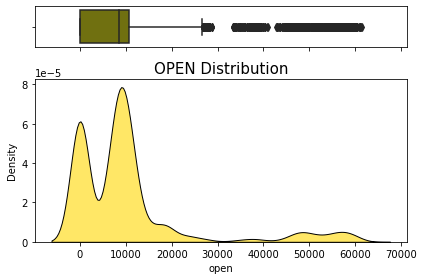

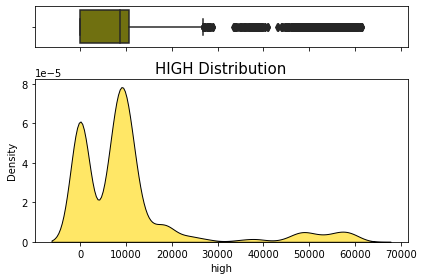

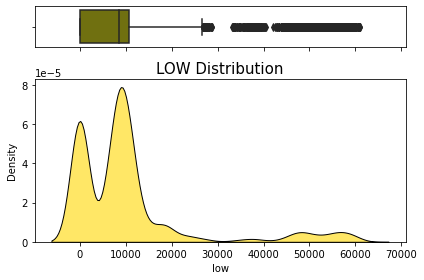

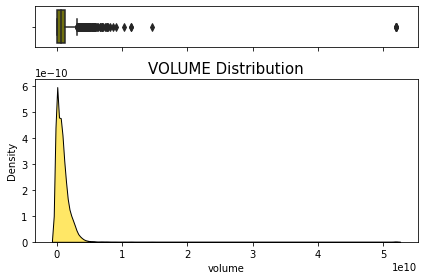

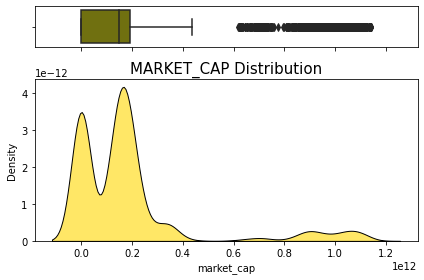

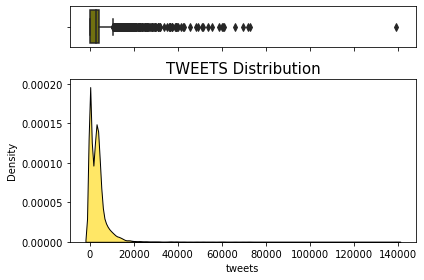

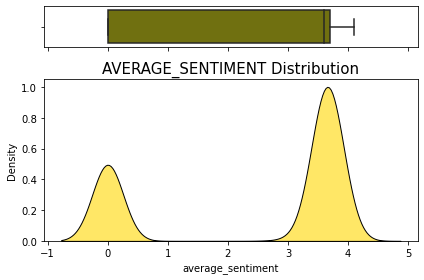

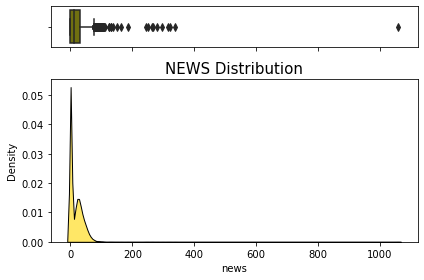

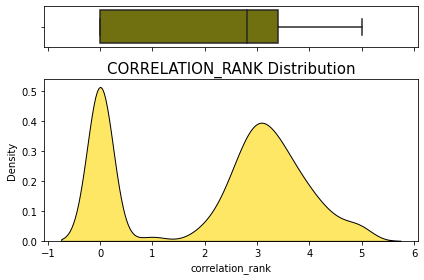

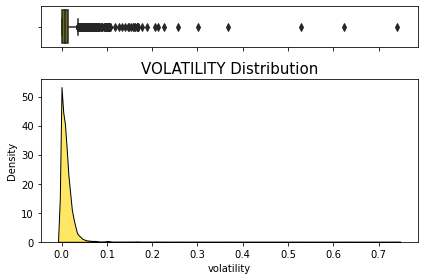

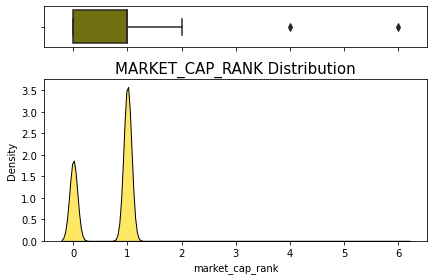

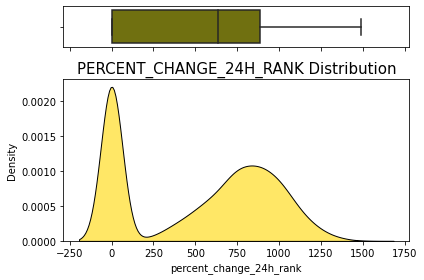

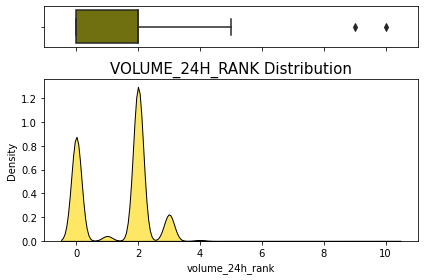

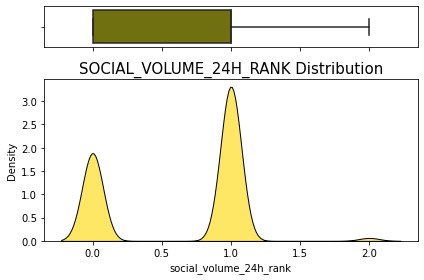

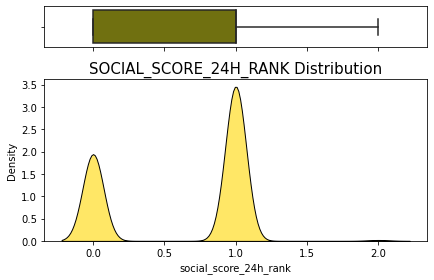

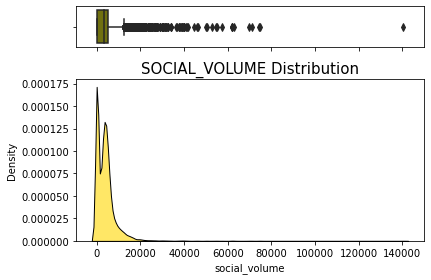

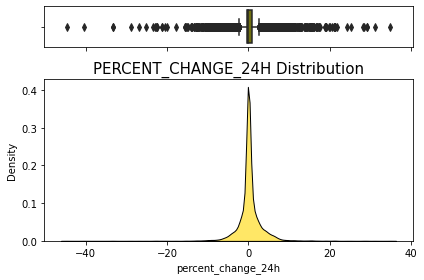

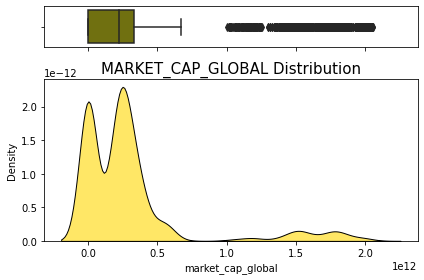

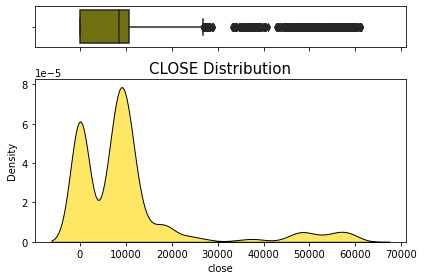

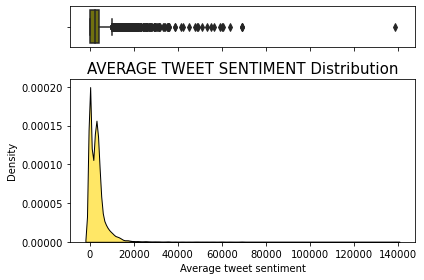

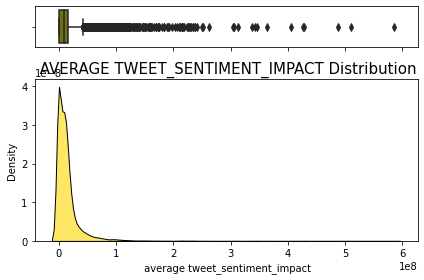

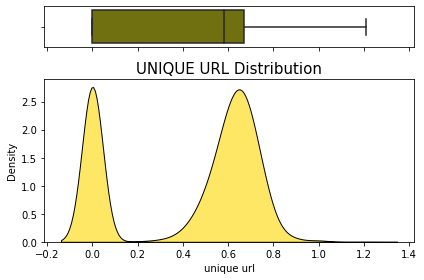

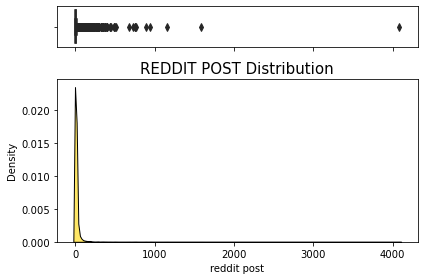

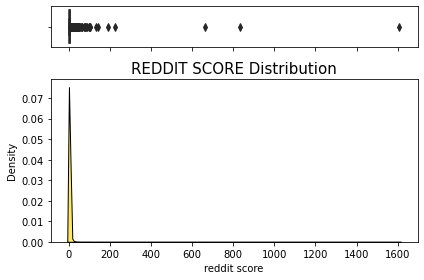

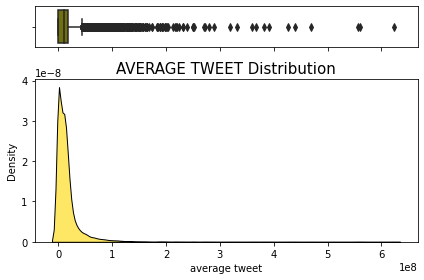

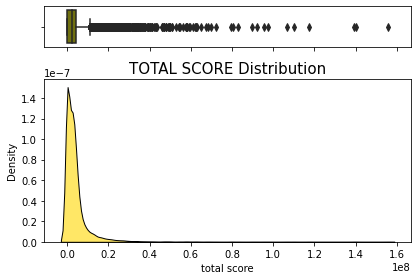

In [19]:
import seaborn as sns
for col in train[num_feat]:
    ax = [None for i in range(2)]
    # set 2 subplots and set ratio of plots 
    f, (ax[0], ax[1]) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.20, .80)
                                        })   
    g1 = sns.boxplot(col, ax=ax[0], data=train, color='olive') # boxplot
    g1.set(xlabel=None) # remove x axis label for boxplot
    g2 = sns.kdeplot(train[col], ax=ax[1], shade=True, color='gold', alpha=0.6, 
                     zorder=3, edgecolor='black') # distribution plot
    plt.title(col.upper()+' Distribution', size=15)
    plt.tight_layout()
    plt.show()

### REMOVING OUTLIERS

In [20]:
def cap_data(train):
    for col in train.columns:
        #print("capping the ",col)
        if (((train[col].dtype)=='float64') | ((train[col].dtype)=='int64')):
            percentiles = train[col].quantile([0.01,0.99]).values
            train[col][train[col] <= percentiles[0]] = percentiles[0]
            train[col][train[col] >= percentiles[1]] = percentiles[1]
        else:
            train[col]=train[col]
    return train

final_df=cap_data(train)

In [21]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(True, True)

In [22]:
# Select main columns to be used in training
main_cols = train.columns.difference(['close'])
X = train[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
main_cols

Index([' average tweet_sentiment_impact', 'Average tweet sentiment',
       'average tweet', 'average_sentiment', 'correlation_rank', 'high', 'low',
       'market_cap', 'market_cap_global', 'market_cap_rank', 'news', 'open',
       'percent_change_24h', 'percent_change_24h_rank', 'reddit post',
       'reddit score', 'social_score_24h_rank', 'social_volume',
       'social_volume_24h_rank', 'total score', 'tweets', 'unique url',
       'volatility', 'volume', 'volume_24h_rank'],
      dtype='object')

<AxesSubplot:>

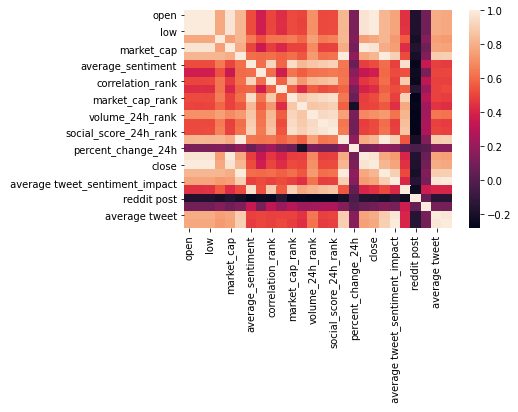

In [24]:
sns.heatmap(train.corr())

In [25]:
def cross_val(modelName):
    pred = cross_val_score(modelName, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [26]:
#Instantiate model 
modelName = DecisionTreeRegressor(splitter='random',random_state=15 )
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 30.7737008285955
MSE: 10101.1802065108
RMSE: 100.50462778653926
R2 Square 0.9999443661571882
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.967394997936732e-13
MSE: 1.71889850317996e-23
RMSE: 4.145960085649596e-12
R2 Square 1.0
__________________________________


In [27]:
results = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, testPred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,30.773701,10101.180207,100.504628,0.999944,0.999962


In [28]:
modelName = LinearRegression()
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 17.540790063387124
MSE: 5520.56821059253
RMSE: 74.30052631437096
R2 Square 0.9999695946000585
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.02407664345607
MSE: 2631.047028693567
RMSE: 51.29373284031458
R2 Square 0.9999860464135317
__________________________________


In [29]:
results1 = pd.DataFrame(data=[["LinearRegression", *evaluate(y_test, testPred) , cross_val(LinearRegression())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results1, ignore_index=True)
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,30.773701,10101.180207,100.504628,0.999944,0.999962
1,LinearRegression,17.540790,5520.568211,74.300526,0.999970,0.999982


In [30]:
modelName = KNeighborsRegressor()
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 53.46758315124986
MSE: 85867.03014105036
RMSE: 293.03076654346444
R2 Square 0.9995270737913866
__________________________________
Train set evaluation:
_____________________________________
MAE: 39.227657985281226
MSE: 49559.411931362345
RMSE: 222.6194329598437
R2 Square 0.9997371648882899
__________________________________


In [31]:
results2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, testPred) , cross_val(KNeighborsRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results2, ignore_index=True)
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,30.773701,10101.180207,100.504628,0.999944,0.999962
1,LinearRegression,17.540790,5520.568211,74.300526,0.999970,0.999982
2,KNeighborsRegressor,53.467583,85867.030141,293.030767,0.999527,0.999628


In [32]:
modelName = RandomForestRegressor(max_depth=2, random_state=0)
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

Test set evaluation:
_____________________________________
MAE: 1812.8479383743115
MSE: 10162121.293965671
RMSE: 3187.8082272880956
R2 Square 0.9440305145393932
__________________________________
Train set evaluation:
_____________________________________
MAE: 1832.1260972842877
MSE: 10172723.003147868
RMSE: 3189.470646227657
R2 Square 0.9460496264436904
__________________________________


In [ ]:
results3 = pd.DataFrame(data=[["RandomForestRegressor", *evaluate(y_test, testPred) , cross_val(RandomForestRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results3, ignore_index=True)
results

In [ ]:
from sklearn.svm import SVR
modelName = SVR()
modelName.fit(X_train,y_train)
testPred = modelName.predict(X_test)
trainPred = modelName.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, testPred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, trainPred)

In [ ]:
results4 = pd.DataFrame(data=[["SVM Regression", *evaluate(y_test, testPred) , cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results = results.append(results4, ignore_index=True)
results

In [ ]:
# Instantiate model
#lm2 = LinearRegression()
# Fit Model
#lm2.fit(X_train, y_train)
# Predict
#y_pred = lm2.predict(X_test)

In [ ]:
# Make predictions in test set and prepare submission file
#predictions = lm2.predict(test[main_cols])
#sub_file = ss.copy()
#sub_file.close = predictions
#sub_file.to_csv('Baseline16.csv', index = False)

In [ ]:
#sub_file.head()